In [12]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
from immunization_campaign import ImmunizationCampaign
from sis_model import SISModel

## Susceptible-Infected_Susceptible (SIS) SIMULATIONS

Neste trabalho iremos explorar como a propagação de doenças infecciosas em dois tipos tiferentes de redes, primeiro uma rede aleatória e em seguida uma rede livre de escala.

## Modelo SIS em redes aleatórias (Erdos Renyi)

Nesta primeira simulação estudaresmo a propagação do patógeno na rede aleatória de Erdos Renyi. Uma característica bastante relevante para rede é o fato da distribuição de graus ser uma Poisson, $p(k) = \frac{e^{-\langle k\rangle}\langle k\rangle^k}{k!}$, isto significa que a maioria dos nós possuem grau próximo a média $\langle k\rangle$, o que não leva a geração de hubs, teremos o fenômeno de "Mundo pequeno".

Para as nossas simulaçõea iremos gerar uma rede (Erdos Renyi) com 1000 nós e grau médio $\langle k\rangle = 20$, sendo assim a probabilidade de dois nós estarem conectados $p=\frac{\langle k \rangle}{N}$. Para a propagação do patógeno iremos usar a probabilidade de infecção $\beta = 0.02$ e variaremos a probabilidade de recuperação $\mu$ entre $0.1, 0.4, 0.5$. Será realizado $7$ simulações para cada valor de $\mu$, a primeira de cada uma delas será feita com $50$ steps e as demais serão acrescidas a cada uma 10 steps.

Durante a simulação iremos calcular a média da razão de infetados de cada simulação para cada valor de $\mu$, para podermos avaliar com maior precisão se a teoria corresponde a prática.

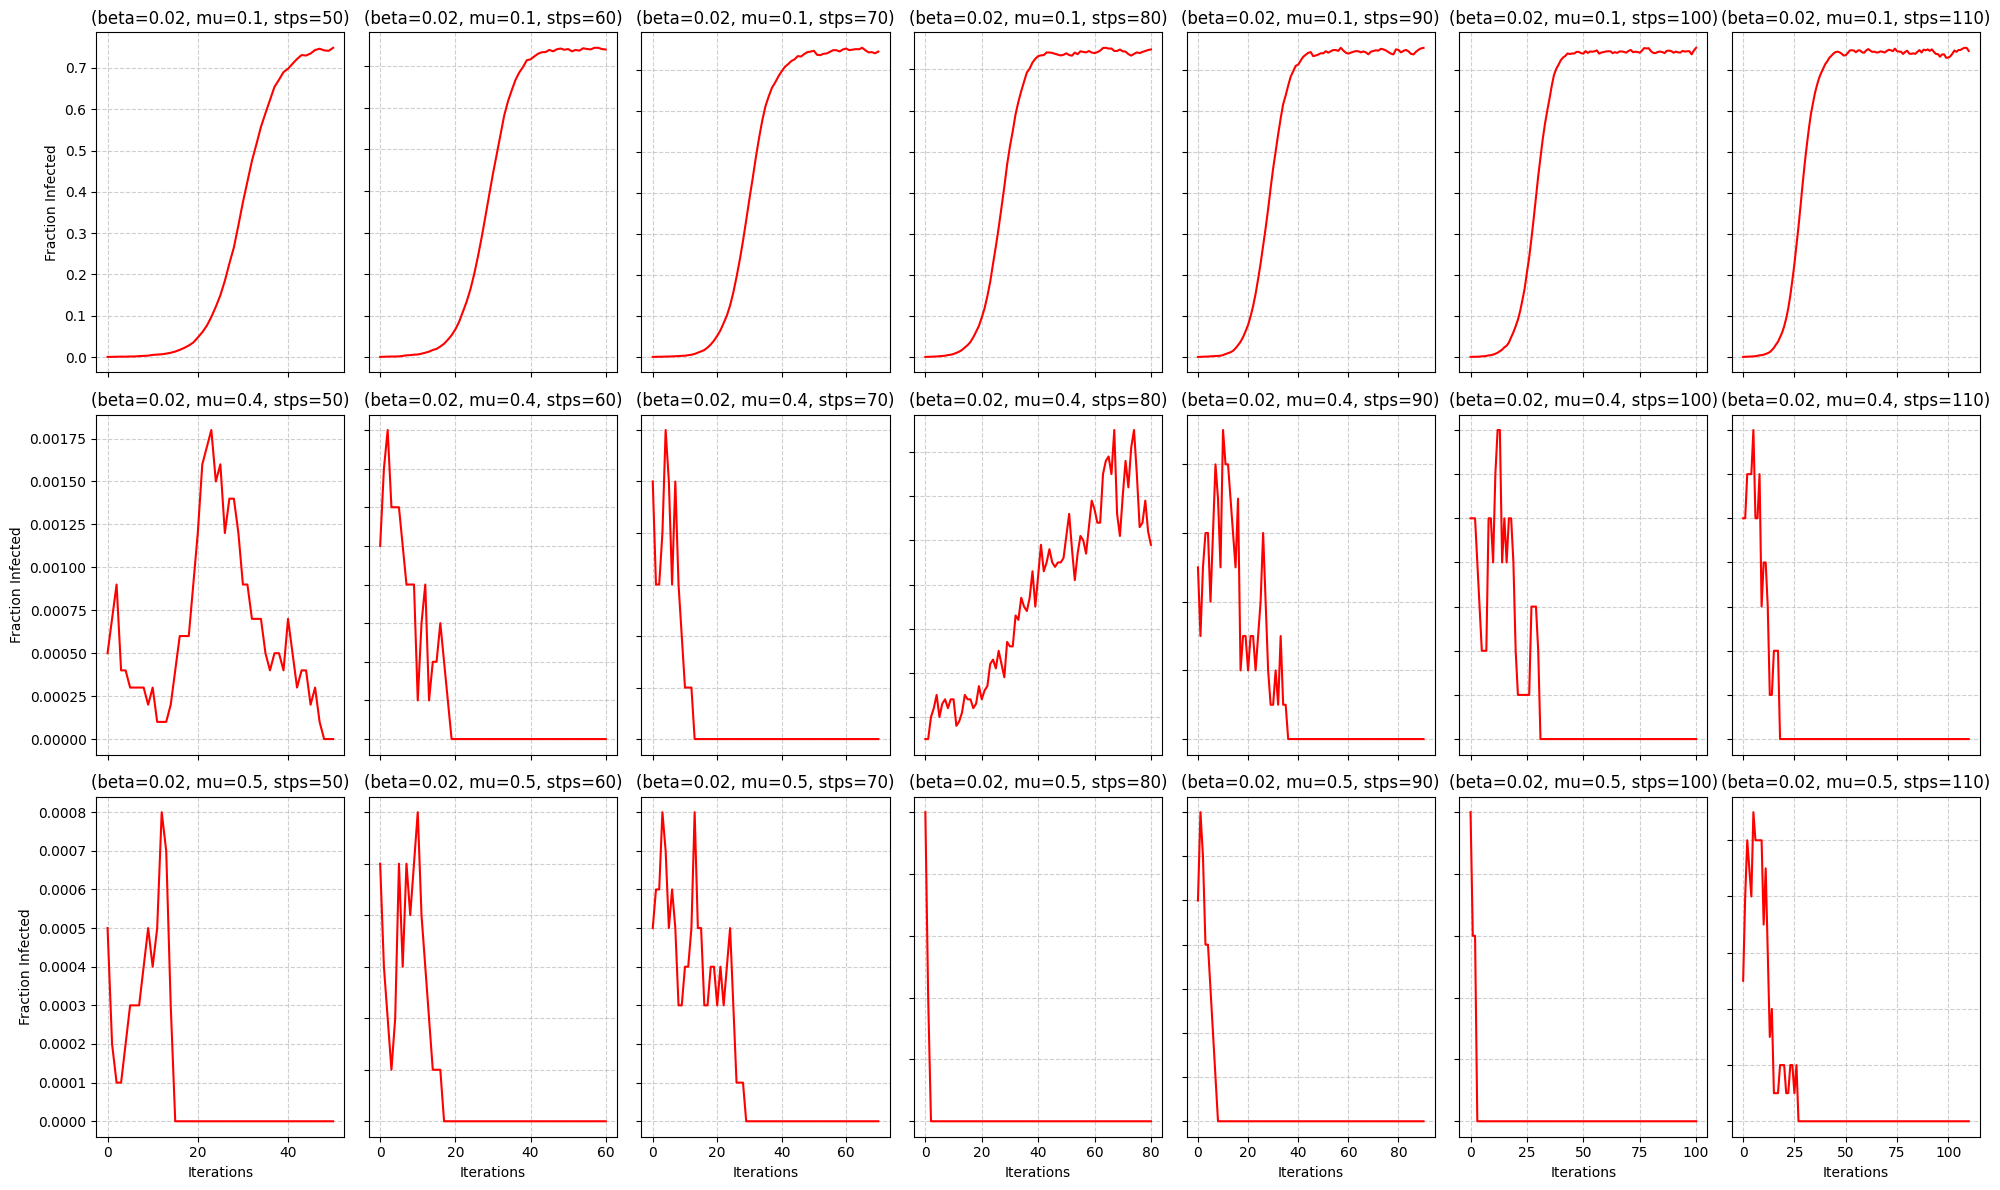

In [38]:
N = 10_000  
k_medio = 20 
p = k_medio / N   
initial_infected = 5  

beta = 0.02  
mu_values = [0.1, 0.4, 0.5]  
simulations_per_mu = 7

G = nx.erdos_renyi_graph(N, p)

history = []
observed_means = []

fig, axs = plt.subplots(len(mu_values), simulations_per_mu, figsize=(20, 12))


for row, mu in enumerate(mu_values):
    history_for_mu = []
    observed_for_mu = []
    theoretical_limit = 0 
    
    for col in range(simulations_per_mu):
        steps_ = 50+10*col
        sis = SISModel(G, beta=beta, mu=mu, initial_infected=initial_infected)
        sis.run(steps=steps_)

        history_for_mu.append(sis.history)

        fraction_infected = [x / N for x in sis.history]
        observed_mean = np.mean(fraction_infected[-20:])  
        observed_for_mu.append(observed_mean)

        axs[row, col].plot(fraction_infected, color="red", linewidth=1.5)
        axs[row, col].set_title(f"(beta={beta}, mu={mu}, stps={steps_})")
        axs[row, col].grid(True, linestyle='--', alpha=0.6)
    
    observed_means.append(observed_for_mu)
    history.append(history_for_mu)

for ax in axs.flat:
    ax.set(xlabel="Iterations", ylabel="Fraction Infected")
    ax.label_outer()

plt.tight_layout()
plt.show()


In [ ]:
for i, mu in enumerate(mu_values):
    print(f"mu = {mu}")
    print(f"Observado: {observed_means[i]} (média dos últimos 20 passos)")

mu = 0.1
Observado: [0.6624049999999999, 0.7389749999999999, 0.745025, 0.7445899999999999, 0.7454400000000001, 0.7446399999999999, 0.742445] (média dos últimos 40 passos)
mu = 0.4
Observado: [0.00040999999999999994, 0.0, 0.0, 0.006125, 0.0, 0.0, 0.0] (média dos últimos 40 passos)
mu = 0.5
Observado: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] (média dos últimos 40 passos)


Da teoria temos que a proporção de nós infectados é dada por $$i(t)=\left(1 - \frac{\mu}{\beta \langle k\rangle}\right) \frac{Ce^{\left(\beta\langle k\rangle - \mu\right)t}}{1 + Ce^{\left(\beta\langle k\rangle - \mu\right)t}},$$ calculando o limite de $t$ tendendo ao infinito temos três possíveis cenários: 
$$
\lim_{t \to \infty} i(t) =
\begin{cases}
1 - \frac{\mu}{\beta \langle k \rangle}, & \text{se } \beta \langle k \rangle - \mu > 0, \\
\left(1 - \frac{\mu}{\beta \langle k \rangle}\right) \frac{C}{1 + C}, & \text{se } \beta \langle k \rangle - \mu = 0, \\
0, & \text{se } \beta \langle k \rangle - \mu < 0.
\end{cases}
.
$$

Isto posto, vamos as simulações.

No primeiro caso temos $\mu = 0.1$, $\beta = 0.02$ e $\langle k \rangle = 20$, obtendo $\beta \langle k \rangle = 0.4 > 0.1 = \mu$, assim:
$$
\lim_{t \to \infty} i(t) = 1 - \frac{\mu}{\beta \langle k \rangle} = 1 - \frac{0.1}{0.4} = 0.75.
$$

Podemos notar que o valor teórico se aproxima muito do valor médio obtido nas simulações, e nem precisamos de muitos steps para isso. Note que na simulação com $80$ steps e o valor médio obtido foi $0.74458$, o que é muito próximo do valor teórico, tendo um erro absoluto de apenas $0.0015$! ISso singnifica que a doença se espalha por $75\%$ da população e se mantém nesse patamar, sendo altamente necessário medidas de imunização.


No segundo caso temos $\mu = 0.4$, $\beta = 0.02$ e $\langle k \rangle = 20$, obtendo $\beta \langle k \rangle = 0.4 = 0.4 = \mu$, assim:

$$
\lim_{t \to \infty} i(t) = \left(1 - \frac{\mu}{\beta \langle k \rangle}\right) \frac{C}{1 + C} = \left(1 - \frac{0.4}{0.4}\right) \frac{C}{1 - C} = 0.
$$
Já para este caso temos a doença já quase completamente erradicada logo na primeira simulação com 50 steps, porém, não sendo um resultado extritamente decrescente, tendo algumas ocilações, mas que se mantém em torno de $0.01$, nos primeiros $60$ steps, e logo convergindo para $0$.


No terceiro caso temos $\mu = 0.5$, $\beta = 0.02$ e $\langle k \rangle = 20$, obtendo $\beta \langle k \rangle = 0.4 < 0.5 = \mu$.

$$
\lim_{t \to \infty} i(t) = 0.
$$

Aqui vemos um caso bastante similar com o anterior, porém com menos oscilações, mas também sendo completamente erradicada após $90$ steps.

Neste experimento conseguimos comprovar que a teoria é bastante precisa!

## Modelo SIS em redes livres de escala (Barabasi-Albert)

Neste experimento iremos utilizar uma rede livre de escalas, essas redes possuem a distribuição de graus seguindo uma lei de potência, $p(k) \sim k^{-\gamma}$, onde $\gamma$ é o expoente da lei de potência. Note que por termos $\gamma$ positivo e a potencia estar sendo elevada com um negativo, temos que a distribuição de graus é decrescente, ainda mais, que decai exponencialmente, o que leva a existência de hubs, nós com grau muito maior que a média, o que leva a uma estrutura de nós centrais.

Para a nossa simulação iremos utilizar $\langle k \rangle = 20$, para gerar a rede utilizaremos o algoritmo de Barabasi-Albert, que possui a seguinte distribuição: $p_k=2m^2k^{-3}$.

Vale ressaltarmos que devemos esperar resultados bem diferentes do que obtivemos na rede de Erdos Renyi, pois a estrutura da rede é bem diferente, antes não existiam hubs, agora temos poucos hubs e muitos nós de baixo grau. Esperamos que a infec;áo comece baixa em nós periféricos por serem a maioria, mas logo se espalhe para os hubs, e que a doença se mantenha por mais tempo na população.



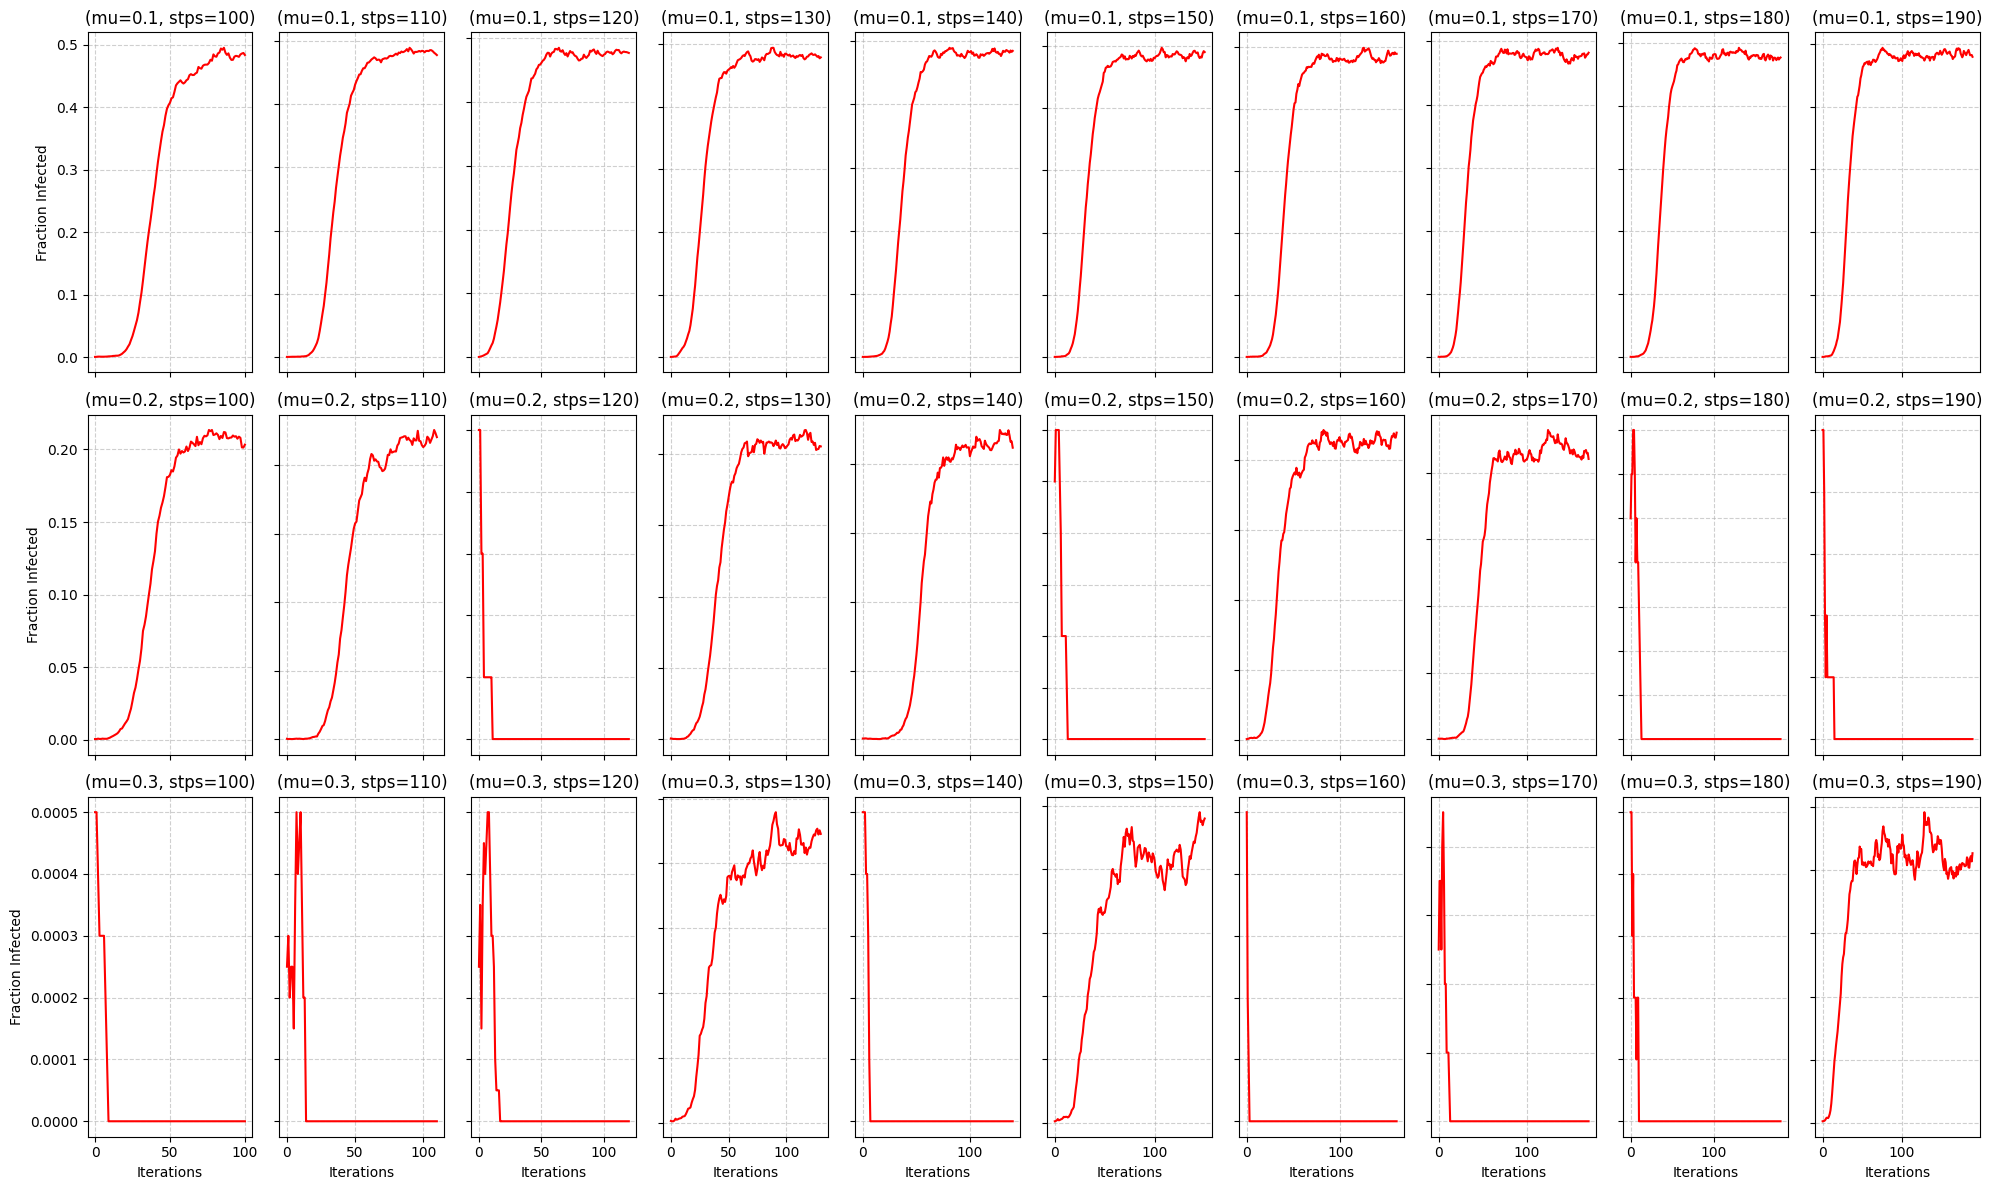

In [52]:
N = 10_000  
k_medio = 20  
initial_infected = 5  
beta = 0.01 
mu_values = [0.1, 0.2, 0.3] 
simulations_per_mu = 10

m = k_medio // 2 
G = nx.barabasi_albert_graph(N, m)

history = []
observed_means = []

fig, axs = plt.subplots(len(mu_values), simulations_per_mu, figsize=(20, 12))


for row, mu in enumerate(mu_values):
    history_for_mu = []
    observed_for_mu = []
    theoretical_limit = 0 
    
    for col in range(simulations_per_mu):
        steps_ = 100+10*col
        sis = SISModel(G, beta=beta, mu=mu, initial_infected=initial_infected)
        sis.run(steps=steps_)

        history_for_mu.append(sis.history)

        fraction_infected = [x / N for x in sis.history]
        observed_mean = np.mean(fraction_infected[-20:])  
        observed_for_mu.append(observed_mean)

        axs[row, col].plot(fraction_infected, color="red", linewidth=1.5)
        axs[row, col].set_title(f"(mu={mu}, stps={steps_})")
        axs[row, col].grid(True, linestyle='--', alpha=0.6)
    
    observed_means.append(observed_for_mu)
    history.append(history_for_mu)

for ax in axs.flat:
    ax.set(xlabel="Iterations", ylabel="Fraction Infected")
    ax.label_outer()

plt.tight_layout()
plt.show()


In [53]:
for i, mu in enumerate(mu_values):
    print(f"mu = {mu}")
    print(f"Observado: {observed_means[i]} (média dos últimos 20 passos)")

print(f"Grau mínimo: {sorted(G.degree, key=lambda x: x[1])[0][1]}")

mu = 0.1
Observado: [0.48447000000000007, 0.48275999999999997, 0.47814500000000004, 0.48071, 0.48348500000000005, 0.4849849999999999, 0.48467000000000005, 0.47658000000000006, 0.4760649999999999, 0.48614000000000007] (média dos últimos 20 passos)
mu = 0.2
Observado: [0.207925, 0.21853499999999998, 0.0, 0.20991999999999997, 0.21893500000000002, 0.0, 0.21409999999999996, 0.21353000000000005, 0.0, 0.0] (média dos últimos 20 passos)
mu = 0.3
Observado: [0.0, 0.0, 0.0, 0.087165, 0.0, 0.08871000000000001, 0.0, 0.0, 0.0, 0.081965] (média dos últimos 20 passos)
Grau mínimo: 10


Apenas pelo de termos conhecimento da modelagem da rede conseguimos prever o compartamento dos resultados, mas agora vamos olhar a teoria mais granular!

Vamos nos introduzir a teoria introduzindo o conceito de limiar epidêmico $\lambda_c$ ele é o valor crítico da taxa de propagação $\lambda = \frac{\beta}{\mu}$ que determina se uma doença se espalha e se torna endêmica ou ele é erradicada. A doença não se torna endêmica se $\lambda < \lambda_c$ e o contrário se $\lambda > \lambda_c$. Em redes livres de escala temos que o limiar epidêmico é dado por $\lambda_c = \frac{\langle k \rangle}{\langle k^2 \rangle}$. Em uma rede livre de escala com $\gamma = 3$ temos que o segundo momento $\langle k^2 \rangle$ muito próximo de $0$, acontece que $\langle k^2 \rangle \sim \ln N$, i.e., ele crescerá logaritmicamente com o número de nós. Temos então um limiar epidêmico muito baixo, o que leva a doença se espalhar com muita facilidade. Segundo a teoria o fração de infectados é dada por  $i(\lambda) \sim 2e^{\frac{-1}{k_{min}\lambda}} = 2e^{-\dfrac{\mu}{\beta k_{min}}}$.

Dado que o grau mínimo do caso da rede analisada no experimento (caso mude o experimento basta substituir na fórmula), temos: 

Para $\mu = 0.1$, $\beta = 0.01$ doença se torna endêmica, e a fração de infectados é estimada por:
$$
i(\lambda) \sim 2e^{-\dfrac{\mu}{\beta k_{min}}} = 2e^{\dfrac{-0.1}{(0.01)(10)}} =  0.735
$$
Aqui vemos um leve descrepância entre a teoria e os resultados emulados, mas a teoria de que a proporção se manteria estável se manteve.

Para $\mu = 0.2$, $\beta = 0.01$ doença se torna endêmica, e a fração de infectados é estimada por:
$$
i(\lambda) \sim 2e^{-\dfrac{\mu}{\beta k_{min}}} = 2e^{\dfrac{-0.1}{(0.02)(10)}} =  0.2706
$$
Aqui obtivemos ótimos resultados! A teoria se manteve muito próxima dos resultados obtidos nas simulações.

Para $\mu = 0.3$, $\beta = 0.01$ doença se torna endêmica, e a fração de infectados é estimada por:
$$
i(\lambda) \sim 2e^{-\dfrac{\mu}{\beta k_{min}}} = 2e^{\dfrac{-0.1}{(0.03)(10)}} =  0.099
$$
Aqui vemos que a teoria se manteve próxima dos resultados obtidos nas simulações, porém com oscilações em algumas das simulações que quasem chegam a imunização se não chegam. Aqui temos um modelo mais imprevissível. 



## Métodos de imunizações em redes livres de escala

Nesta parte do trabalho estamos interessados em descobrirmos um modo eficiente de imunizarmos a população. Os métodos são três: imunização aleatória, imunização por hubs e imunização de vizinhos escolhidos aleatóriamente. Este último método pode parecer não fazer sentido, mas lhe garanto que ele é melhor do que o de imunização aleatória, pois nossa rede possui muitos nós de baixo grau ligados a hubs, e se imunizarmos um hub, teremos uma grande barreira para o virus se espalhar, o que leva a uma imunização mais eficiente! Aqui temos o efeito de "os meus amigos são mais populares do que eu".
A imunização aleatória não é de se esperar que seja eficiente, pois a probabilidade de imunizarmos um hub é muito baixa e a de imunizarmos um nó periférico muito alta. E por fim não sendo surpresa para ninguém esperamos que a imunização por hubs seja a mais eficiente. Vamos ver na prática!

C:\Users\Isas_\AppData\Local\Temp\ipykernel_32680\1275937407.py:32: RuntimeWarning: invalid value encountered in scalar divide
  results_hubs.append(first_moment_hubs / second_moment_hubs)


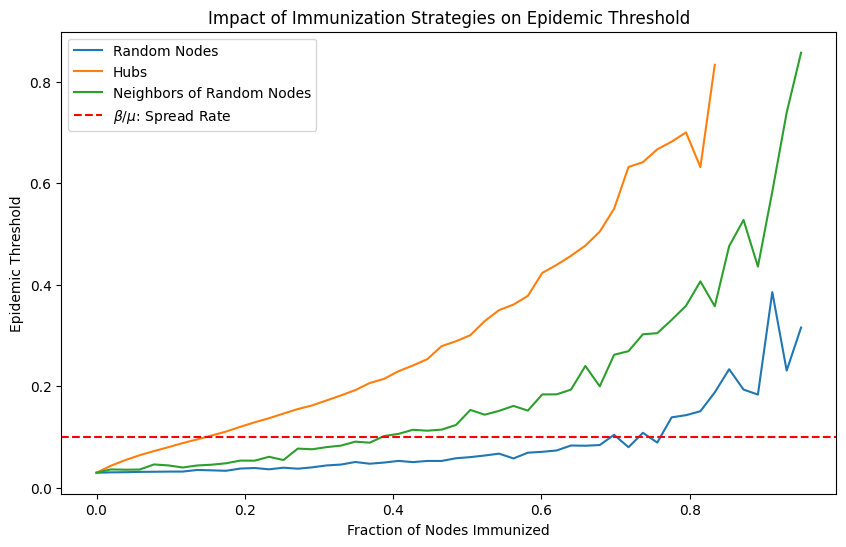

In [55]:
beta = 0.01
mu = 0.1
N = 1000
k_medio = 20

G = nx.barabasi_albert_graph(N, int(k_medio/2), seed=21)

fractions = np.linspace(0, 0.95, 50)
results_random = []
results_hubs = []
results_neighbors = []

for fraction in fractions:
    G_random = G.copy()
    G_hubs = G.copy()
    G_neighbors = G.copy()
    
    random_nodes = random.sample(list(G_random.nodes()), int(fraction * len(G_random)))
    G_random.remove_nodes_from(random_nodes)
    sis_random = SISModel(G_random, beta=beta, mu=mu)
    sis_random.run(steps=50)
    first_moment_random = np.mean([deg for _, deg in G_random.degree()])
    second_moment_random = np.mean([deg ** 2 for _, deg in G_random.degree()])
    results_random.append(first_moment_random / second_moment_random)
    
    hubs = sorted(G_hubs.degree(), key=lambda x: x[1], reverse=True)[:int(fraction * len(G_hubs))]
    G_hubs.remove_nodes_from([node for node, _ in hubs])
    sis_hubs = SISModel(G_hubs, beta=beta, mu=mu)
    sis_hubs.run(steps=50)
    first_moment_hubs = np.mean([deg for _, deg in G_hubs.degree()])
    second_moment_hubs = np.mean([deg ** 2 for _, deg in G_hubs.degree()])
    results_hubs.append(first_moment_hubs / second_moment_hubs)
    
    selected_nodes = random.sample(list(G_neighbors.nodes()), int(fraction * len(G_neighbors)))
    neighbors = set()
    for node in selected_nodes:
        neighbors.update(set(G_neighbors.neighbors(node)))
        if len(neighbors) >= int(fraction * len(G_neighbors)):
            break
    neighbors = list(neighbors)[:int(fraction * len(G_neighbors))]
    G_neighbors.remove_nodes_from(neighbors)
    sis_neighbors = SISModel(G_neighbors, beta=beta, mu=mu)
    sis_neighbors.run(steps=50)
    first_moment_neighbors = np.mean([deg for _, deg in G_neighbors.degree()])
    second_moment_neighbors = np.mean([deg ** 2 for _, deg in G_neighbors.degree()])
    results_neighbors.append(first_moment_neighbors / second_moment_neighbors)

plt.figure(figsize=(10, 6))
plt.plot(fractions, results_random, label="Random Nodes")
plt.plot(fractions, results_hubs, label="Hubs")
plt.plot(fractions, results_neighbors, label="Neighbors of Random Nodes")
plt.axhline(y=beta/mu, color='r', linestyle='--', label=r"$\beta / \mu$: Spread Rate")
plt.xlabel("Fraction of Nodes Immunized")
plt.ylabel("Epidemic Threshold")
plt.legend()
plt.title("Impact of Immunization Strategies on Epidemic Threshold")
plt.show()


In [56]:
degrees = np.array([deg for _, deg in G.degree])
primeiro_momento, segundo_momento = np.mean(degrees), np.mean(degrees**2)
print(f"Primeiro momento: {primeiro_momento}")
print(f"Segundo momento: {segundo_momento}")

Primeiro momento: 19.8
Segundo momento: 678.656


Como vimos no experimento passado para conseguirmos a não entrar num estado endêmico devemos ter $\lambda < \lambda_c$, ou seja, $\dfrac{\beta}{\mu} < \dfrac{\langle k\rangle}{\langle k^2\rangle}$, da teoria sabemos que em redes heterogêneas como as redes livres de escala o limiar de imunização $g_c$ é dado por $g_c = 1 - \frac{\mu}{\beta}\frac{\langle k \rangle}{\langle k^2 \rangle}$, da nossa simulação temos que: 
$$
g_c = 1 - \frac{\mu}{\beta}\frac{\langle k \rangle}{\langle k^2 \rangle} = 1 - \frac{0.1}{0.01}\frac{19.8}{678.656} = 0.70824 
$$
Veja que o valor encontrado pela teoria usando a imunização aleatória é muito próximo do valor encontrado nas simulações! As nossas suposições iniciais também foram satisfeitas! A fração de nós imunizados para imunização por hub é de aproximadamente $0.17$ para podermos controlar o estado endêmico, enquanto para a estratégia de imunizarmos os vizinhos de um nó aleatório é de aproximadamente $0.39$ e o menos eficaz de todos, aleatoriamente, é de $0.7$.


## Referências

[1] Barabási, A.-L. (2016). *Network Science*